<div style="padding: 10px 20px; background-color: #FFFFFF; text-align: center;">
    <img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" 
         width=400 
         style="margin: 5px auto !important;">
    <h1 align=center>Hacktiv8 PTP Introduction to Data Science Final Projects</h1>
    <h3 align=center>Cyberbullying Classification</h3>
</div>

## Pendahuluan

### Latar Belakang

Sejak beberapa tahun ke belakang, media sosial menjadi salah satu media penyebaran informasi terbesar yang digunakan di masyarakat. Media sosial memberikan ruang untuk setiap individu dapat melakukan produksi, distribusi, dan konsumsi informasi dengan sangat mudah tanpa mengenal ruang dan waktu. Kemudahan dalam menyampaikan informasi dan berekspresi membuat volume data media sosial menjadi sangat besar. Data ini menyimpan berbagai informasi yang berharga. Salah satu penggunaan media sosial dalam di dalam masyarakat sebagai media diskusi atau sekedar penyampaian opini tentang berbagai isu yang berkembang di masyarakat. 

Kemudahan yang dihadirkan media sosial tidak hanya memberikan dampak yang bersifat positif. Salah satu hal yang paling mudah terlihat adalah mudahnya seseorang untuk melakukan bullying atau berkata dengan kebencian terhadap sesama pengguna di media sosial. Hal ini tentunya menjadi masalah yang cukup serius karena memungkinkan terciptanya lingkungan yang buruk bagi masyarakat ketika bermedia sosial. Bukan tidak mungkin banyaknya permasalahan mental yang dialami orang-orang tidak lepas dari kondisi ini. Kondisi ini juga tentunya sangat tidak sesuai dengan budaya Indonesia yang terkenal akan keramahannya antar sesama. Terpisahnya jarak dan tempat yang dihubungkan oleh media sosial rasanya membuat hilangnya budaya masyarakat Indonesia yang selalu sopan dan santun kepada siapa pun.

Efek negatif yang ditimbulkan oleh teknologi seharusnya dapat diatasi oleh teknologi lain. Salah satu solusi untuk mengurangi keberadaan ujaran kebencian dan bullying di media sosial adalah dengan melakukan klasifikasi atas pesan yang diterima untuk meniadakan pesan yang diduga mengandung perundungan. Oleh karena itu, permasalahan yang dianalisis dan dicari solusinya pada implementasi ini adalah klasifikasi cyberbullying atau ujaran kebencian.

### Deskripsi Permasalahan

Implementasi ini bermaksud untuk melakukan klasifikasi kalimat yang mengandung perundungan. Data yang digunakan adalah data berbahasa Inggris karena sulitnya menemukan dataset berbahasa Indonesia. Data yang akan digunakan memiliki 6 label dengan 5 label cyberbullying (**age, religion, ethnicity, gender, other**) dan 1 label **not cyberbullying**. Pada implementasinya saya bermaksud untuk menganalisis terlebih dahulu dan akan menentukan apakah akan menggunakan 6 label atau ditransformasikan menjadi 2 label. 

Jumlah data berada pada angka 47692, dengan tiap datanya berisikan pesan serta labelnya. Nantinya data ini akan di-encode menjadi representasi vector sebelum masuk ke dalam algoritma pembelajaran. Tujuan utama klasifikasi adalah membedakan kalimat cyberbullying dan yang bukan.

### Data Overview

#### Import Pustaka

In [48]:
%matplotlib inline 

import re
import string
import nltk
import pickle
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from spacy.lang.id.stop_words import STOP_WORDS as STOPWORDS

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [49]:
sns.set_style("white")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action="ignore", category=FutureWarning)

#### Persiapan Data

In [50]:
df1 = pd.read_csv('dataset/id_cyberbullying.tsv', sep="\t", encoding = "ISO-8859-1")
df1 = df1.drop(['no'], axis=1)
df1['label'] = df1.apply(lambda row: "cyberbullying" if row.label == "CB" else "not_cyberbullying", axis=1)
df1

,text,label
0,"Klo fadli zon goblok, boleeeh?",cyberbullying
1,"@detikcom Jangan nyinyirin pak fadli zon, dia gitu2 punya prestasi mecahin rekor muri batu akik..hehe",cyberbullying
2,"@ahmadwaluy @bravo1282 @fadlizon Kritik siapa bisa di penjara? Fadli zon? Kritik presiden aja dia ga di penjara. Zon kerja buat rakyat mas, kalah ama pelacur. Pelacur di katain pelacur aja ga marah mas.",cyberbullying
3,"@fadlizon @jokowi Hati penuh dendam, pikiran selalu negatif, mata hati tertutup yg dilihat selalu agak kurang tepat, saya melihat wajar atas penglihatan pak son.",cyberbullying
4,"@fadlizon @jokowi Kerja anda apa zon bisanya cuma nyinyi r aja, semoga masyarakat indonesia untk berikutnya tdk memilih org yg bisanya nyinyir",cyberbullying
...,...,...
295,"ya gpp dong,kalah menang itu biasa,yang penting kesatuan NKRI itu yg nomer 1 RT @kompascom: Fadli Zon: Orang-orang Takut Prabowo Maju Capres karena Khawatir Jokowi Kalah",not_cyberbullying
296,"Yang kyk gini nih, generasi penerus yang pas. Buat Fadli Zon atau Fahri Hamzah. Hhhhh",not_cyberbullying
297,@detikcom Prabowo dan Fadli Zon...itu baru capres cawapres popular ??,not_cyberbullying
298,Ketika Fadli Zon dan Fachri Hamzah harus Menanggung semua hal yang dianggap Negatif di DPRRI Seolah-olah Pemilik DPRRI hanya Fadli Zon dan Fachri Hamzah. Padahal Mayoritas Penduduk DPRRI adalah Pendukung Pemerintah!!,not_cyberbullying


In [51]:
df2 = pd.read_csv('dataset/id_hatespeech.txt', sep="\t", encoding = "ISO-8859-1")
df2 = df2.reindex(columns=['Tweet', 'Label'])
df2 = df2.rename(columns={"Tweet":"text", "Label": "label"})
df2['label'] = df2.apply(lambda row: "cyberbullying" if row.label == "HS" else "not_cyberbullying", axis=1)
df2

,text,label
0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera Menonaktifkan Ahok Jadi Gubernur DKI https:\/\/t.co\/KH5vIRwPdO,not_cyberbullying
1,RT @baguscondromowo: Mereka terus melukai aksi dalam rangka memenjarakan Ahok atau Ahok gagal dalam Pilkada.,not_cyberbullying
2,Sylvi: bagaimana gurbernur melakukan kekerasan perempuan? Buktinya banyak ibu2 mau foto bareng #DebatFinalPilkadaJKT,not_cyberbullying
3,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Jalan di Bekasi Belum Sempat Terungkap https:\/\/t.co\/m3HopPLUID\u2026",not_cyberbullying
4,RT @lisdaulay28: Waspada KTP palsu.....kawal PILKADA https:\/\/t.co\/OOoERQV4SM,not_cyberbullying
...,...,...
708,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai....@basuki_btp...,cyberbullying
709,"Betul bang hancurkan merka bang, musnahkan china babi dibumi pertiwi indonesia, berkedok reklamasi itu ahok",cyberbullying
710,"Sapa Yg bilang Ahok anti korupsi!?, klo grombolannyA NGOMONG gtu wajar, AHOK ITU MAFIA KORUPTOR SANG PENISTA AGAMA YG DILINDUNGI ISTANA PKI",cyberbullying
711,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar Pcetar, langsung kejang2 die, ngadu ke Jkw, Jkw: makanye sunat dulu, bru NGOMONG Almaidah.",cyberbullying


In [52]:
df3 = pd.read_csv('dataset/id_hatespeech_multi.csv', encoding = "ISO-8859-1")
df3 = df3.loc[:, ['Tweet', 'HS']]
df3 = df3.rename(columns={"Tweet": "text", "HS": "label"})
df3['label'] = df3.apply(lambda row: "cyberbullying" if row.label == 1 else "not_cyberbullying", axis=1)
df3

,text,label
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',cyberbullying
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',not_cyberbullying
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",not_cyberbullying
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',not_cyberbullying
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',cyberbullying
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',cyberbullying
13165,USER Kasur mana enak kunyuk',not_cyberbullying
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',not_cyberbullying
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',not_cyberbullying


#### Merge Data

In [53]:
df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

#### Cuplikan Data

In [54]:
df

,text,label
0,"Klo fadli zon goblok, boleeeh?",cyberbullying
1,"@detikcom Jangan nyinyirin pak fadli zon, dia gitu2 punya prestasi mecahin rekor muri batu akik..hehe",cyberbullying
2,"@ahmadwaluy @bravo1282 @fadlizon Kritik siapa bisa di penjara? Fadli zon? Kritik presiden aja dia ga di penjara. Zon kerja buat rakyat mas, kalah ama pelacur. Pelacur di katain pelacur aja ga marah mas.",cyberbullying
3,"@fadlizon @jokowi Hati penuh dendam, pikiran selalu negatif, mata hati tertutup yg dilihat selalu agak kurang tepat, saya melihat wajar atas penglihatan pak son.",cyberbullying
4,"@fadlizon @jokowi Kerja anda apa zon bisanya cuma nyinyi r aja, semoga masyarakat indonesia untk berikutnya tdk memilih org yg bisanya nyinyir",cyberbullying
...,...,...
14177,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',cyberbullying
14178,USER Kasur mana enak kunyuk',not_cyberbullying
14179,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',not_cyberbullying
14180,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',not_cyberbullying


Teramati bahwa data masih sangat kotor karena diambil dari media sosial sehingga masih memiliki mention, hashtag, hingga url. Diperlukan preprocessing untuk menangani ini.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14182 entries, 0 to 14181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14182 non-null  object
 1   label   14182 non-null  object
dtypes: object(2)
memory usage: 221.7+ KB


In [56]:
df.isnull().sum()

text     0
label    0
dtype: int64

### Preprocessing
Method preprocessing digunakan untuk mentransformasikan teks pesan dari media sosial menjadi lebih bersih dan tidak lagi mengandung entitas yang kurang diperlukan. Beberapa hal yang dilakukan adalah :
- Lowercasing
- Hapus URL, mention, Hashtag
- Hapus STOPWORDS atau kata yang sangat sering muncuk dan tidak perlu
- Hapus selain huruf sehingga vektor nanti hanya terdiri dari kata

In [57]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

STOPWORDS.update(['saya', 'user', 'url', 'yg', 'lo'])

def show_wordcloud(data):
    words = ''
     
    for sentence in data:
     
        tokens = str(sentence).split()
         
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
         
        words += " ".join(tokens) + " "
     
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(words)
     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
     
    plt.show()
    
def show_top_ngram(df_column):
    
    vectorizer = TfidfVectorizer(ngram_range=(2,2))

    ngrams = vectorizer.fit_transform(df_column)
    count_values = ngrams.toarray().sum(axis=0)
    vocab = vectorizer.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

    return df_ngram

def delete_url(text):
    links = re.findall(re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL), text)
    for link in links:
        text = text.replace(link[0], ' ')    
    return text

def delete_mention_tag(text):
               
    # filter kata yang mengandung penanda mention dan hashtag
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in ['@','#']:
                words.append(word)
    return ' '.join(words)

def preprocessing(text):
    text = text.lower()                    # convert ke lowercase
    text = delete_url(text)                # hapus URL/link
    text = delete_mention_tag(text)        # hapus entitas mention dan hashtags
    text = text.strip()
#     text = " ".join([word for word in text.split() if not word in set(STOPWORDS)]) 
    text = " ".join([word for word in text.split() if not word in set(['lo', 'yg', 'saya', 'user', 'url'])]) 
    text = re.sub(r" \d+ ", " ", text)     # hapus digit
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"[^a-z ]", "", text)
    text = re.sub(r"  ", " ", text)
    return text

In [58]:
STOPWORDS

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

#### Aplikasikan Preprocessing ke Dataset

In [59]:
df['text'] = df.apply(lambda row: preprocessing(row.text), axis=1)

#### Kondisi Persebaran Label

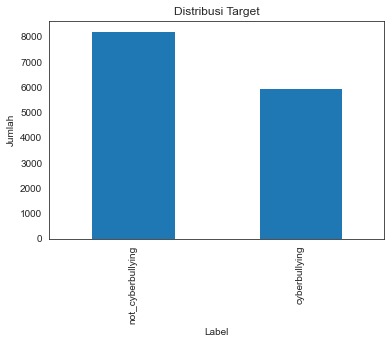

In [60]:
df['label'].value_counts().plot.bar(figsize=(6, 4));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

### Pengenalan Data Lanjut

#### Perbandingan/Distribusi Kelas

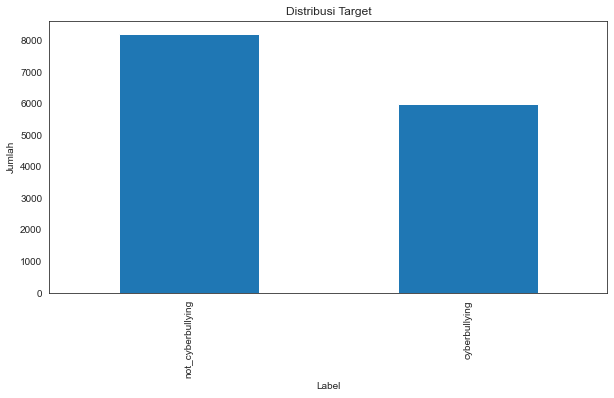

In [61]:
df['label'].value_counts().plot.bar(figsize=(10, 5));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

Seperti yang telah dijelaskan sebelumnya bahwa sekarang terdapat 5 label dan terdapat imbalance pada kategori not_bullying. Hal ini cukup baik karena untuk penggunaan 5 label, kategori yang berlebih dapat dikurangi. Dan ketika penggunaan 2 label maka data yang dimiliki menjadi cukup banyak . 

#### Distribusi Panjang Kata Pesan

In [62]:
df['text_length'] = df.apply(lambda row: len(row.text.split()), axis=1)

In [63]:
df

,text,label,text_length
0,klo fadli zon goblok boleeeh,cyberbullying,5
1,jangan nyinyirin pak fadli zon dia gitu punya prestasi mecahin rekor muri batu akikhehe,cyberbullying,14
2,kritik siapa bisa di penjara fadli zon kritik presiden aja dia ga di penjara zon kerja buat rakyat mas kalah ama pelacur pelacur di katain pelacur aja ga marah mas,cyberbullying,30
3,hati penuh dendam pikiran selalu negatif mata hati tertutup dilihat selalu agak kurang tepat melihat wajar atas penglihatan pak son,cyberbullying,20
4,kerja anda apa zon bisanya cuma nyinyi r aja semoga masyarakat indonesia untk berikutnya tdk memilih org bisanya nyinyir,cyberbullying,19
...,...,...,...
14177,jangan asal ngomong ndasmu congor lu sekate anjyng,cyberbullying,8
14178,kasur mana enak kunyuk,not_cyberbullying,4
14179,hati hati bisu gnnlagi bosan huft xfxfxxaa,not_cyberbullying,7
14180,bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut revolusi jiwa,not_cyberbullying,18


Boxplot Keseluruhan Data

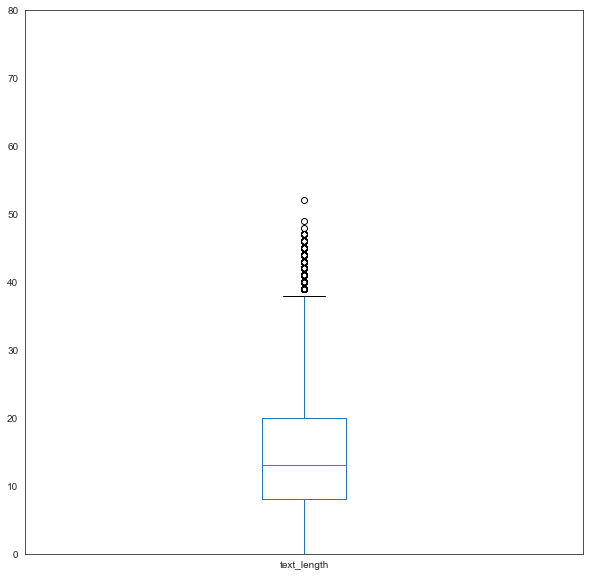

In [64]:
disp = df.boxplot(column = ['text_length'], grid = False, figsize=(10, 10))
plt.ylim(0, 80)
plt.show();

Panjang pesan cukup beragam. Dapat dilihat pada boxplot diatas panjang kata rata-rata berada sekitar angka 12 dan distribusinya lebih dekat ke kurang lebih 10 kata. Kata diatas 35 kata sudah mulai jarang sehingga terdeteksi sebagai pencilan. Informasi ini dapat menjadi bahan pemotongan jumlah kata jika nantinya diperlukan.

Histogram Distribusi Panjang Data

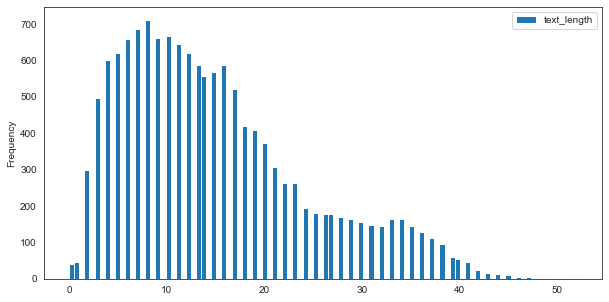

In [65]:
df.plot.hist(bins=100, figsize=(10, 5))
plt.show();

Boxplot Per Label

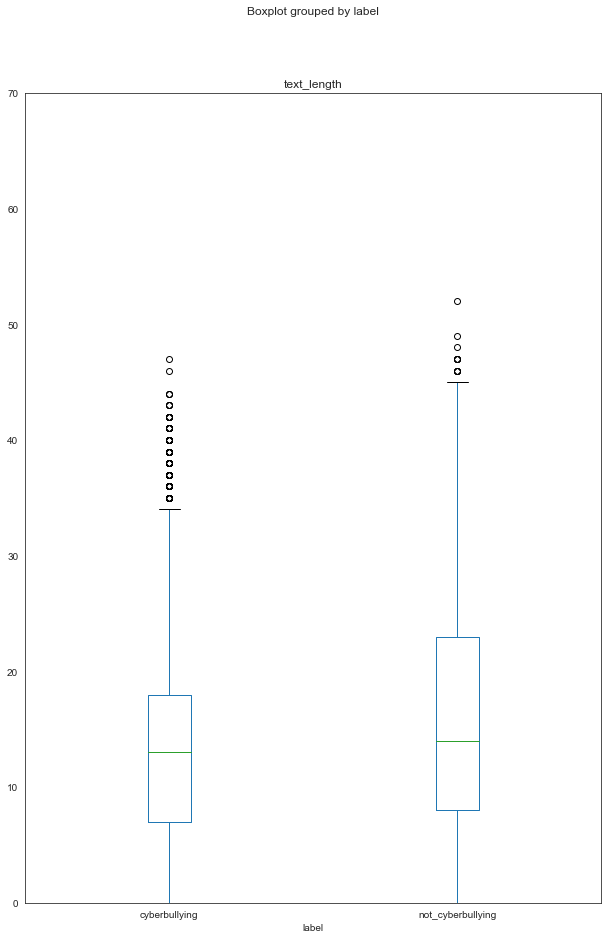

In [66]:
disp = df.boxplot(by ='label', column=['text_length'], grid = False, figsize=(10, 15))
plt.ylim(0, 70)
plt.show();

Persebaran yang cukup berbeda terlihat pada kelas other dan religion. Kelas other jumlah katanya cenderung lebih sedikit sedangkan relogion lebih panjang. Bahkan terlihat kategori bullying religion rata-rata panjang kalimatnya lebih dari 20 kata. Catatan untuk visualisasi ini sebenarnya masih terdapat outlier yang jauh diatas 70, namun demi kenyamanan visual tidak ditampilkan.

### Distribusi Kata
Untuk setiap kelasnya, coba dianalisis kata-kata yang dominan dengan menggunakan wordcloud. Beberapa kata yang kurang merepresentasikan nantinya akan ditambahkan ke dalam STOPWORDS sehingga tidak mempengaruhi klasifikasi. Selain itu juga ditampilkan 20 bigram teratas untuk memperlihatkan kemunculan bigram penanda kelas.

#### Distribusi Kata Keseluruhan

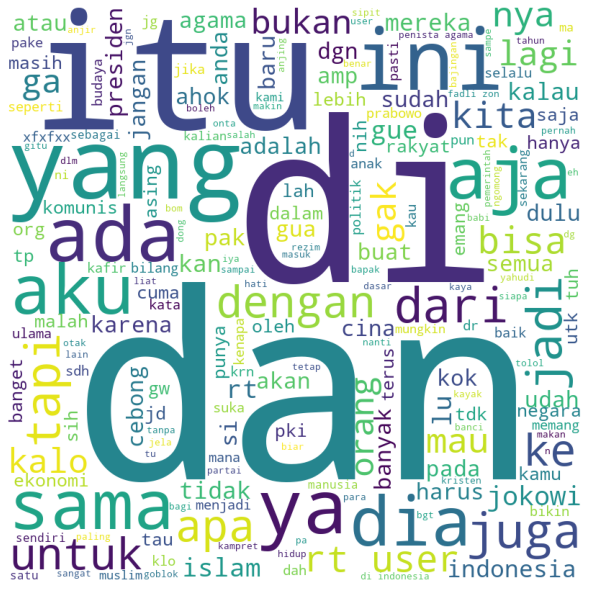

In [67]:
show_wordcloud(df['text'])

#### Distribusi Kata Kelas Cyberbullying Kategori Cyberbullying

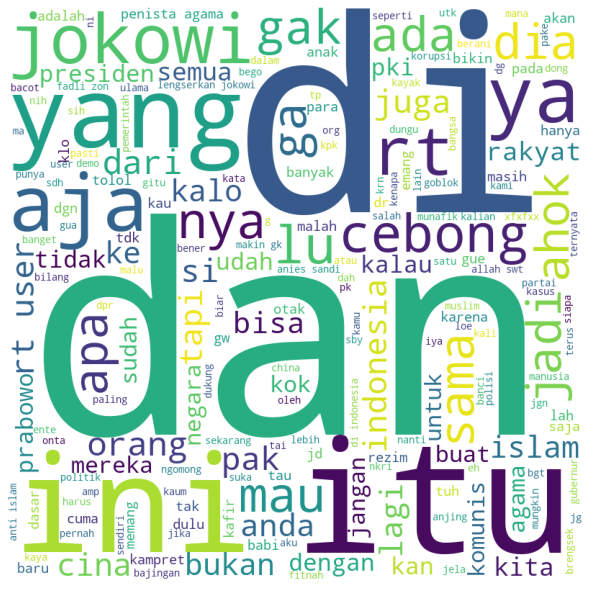

In [68]:
show_wordcloud(df[df['label'] == 'cyberbullying']['text'])

In [69]:
show_top_ngram(df[df['label'] == 'cyberbullying']['text'])[:20]

,frequency,bigram/trigram
0,36.309047,rt user
1,24.606199,penista agama
2,21.486453,lengserkan jokowi
3,13.530071,fadli zon
4,13.420646,ganyang pki
5,12.714283,anti islam
6,12.625668,allah swt
7,12.113886,anies sandi
8,11.253285,di indonesia
9,9.002705,antek komunis


#### Distribusi Kata Kelas Cyberbullying Kategori Not Cyberbullying

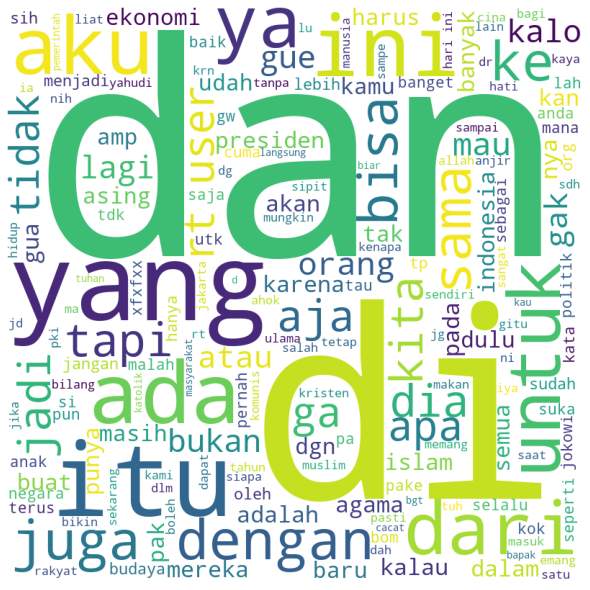

In [70]:
show_wordcloud(df[df['label'] == 'not_cyberbullying']['text'])

In [71]:
show_top_ngram(df.loc[df['label'] == 'not_cyberbullying'][:5000]['text'])[:20]

,frequency,bigram/trigram
0,33.128642,rt user
1,12.164942,pak ahok
2,10.733836,fadli zon
3,8.845105,anti hoax
4,8.710035,presiden jokowi
5,7.114202,hari ini
6,7.101539,pilkada dki
7,6.577081,user user
8,6.238545,di indonesia
9,5.799537,ada yang


Terdapat catatan untuk kelas not bullying ini, ditemukan bahwa domain nya sangat erat dengan school sehingga berpotensi bias. Namun dikarenakan keterbatasan data berlabel, saya coba tetap menggunakan ini terlebih dahulu untuk nantinya dapat ditambahkan dengan pesan yang diberi label sendiri.

## Eksperimen Model

### Pendefinisian Kelas Pipeline
Dikarenakan diperlukan preprocessing pada text input sebelum di-encoding, maka dibuat kelas baru yang fungsinya mirip dengan fungsi pipeline dari sklearn. Objek dari kelas ini nantinya akan menjadi model yang disimpan untuk deployment karena sudah termasuk preprocessing text dan juga sekaligus menyimpan berbagai model pemrosesan seperti sampling, vectorizer, encoder, hingga classifier.

In [72]:
df = df.drop('text_length', axis=1)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

class ModelPipeline:
    def __init__(self, imbalance_handler, vectorizer, encoder, classifier):
        self.imbalance_handler = imbalance_handler
        self.vectorizer = vectorizer
        self.encoder = encoder
        self.classifier = classifier
        
    def encoder(self):
        return self.encoder
    
    def fit(self, X_train, y_train):
        X_train, y_train = self.imbalance_handler.fit_resample(X_train, y_train)
        
        self.vectorizer.fit(X_train['text'].values)
        X_train = self.vectorizer.transform(X_train['text'].values)
        
        self.encoder.fit(y_train)
        y_train = pd.DataFrame(self.encoder.transform(y_train.values.ravel()))
    
        return self.classifier.fit(X_train, y_train.values.ravel())
    
    def predict(self, X_test):
        X_test['text'] = X_test.apply(lambda row: preprocessing(row.text), axis=1)
        X_test = self.vectorizer.transform(X_test['text'].values)
        return self.classifier.predict(X_test)
    
    def predict_proba(self, X_test):
        X_test['text'] = X_test.apply(lambda row: preprocessing(row.text), axis=1)
        X_test = self.vectorizer.transform(X_test['text'].values)
        return self.classifier.predict_proba(X_test)[:, 1]
    
    def classification_report(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        return classification_report(y_test, y_pred, target_names=self.encoder.classes_)
    
    def precision_recall_curve(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        display = PrecisionRecallDisplay.from_predictions(
            y_test, y_pred, name="NaiveBayes", ax = plt.gca()
        )
        res = display.ax_.set_title("Precision-Recall Curve")
        return res
    
    def confusion_matrix_display(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        
        fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
        
        display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None, display_labels=self.encoder.classes_, xticks_rotation='vertical')
        display.ax_.set_title("Confusion Matrix Non Normalized")
        
        display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true', display_labels=self.encoder.classes_, xticks_rotation='vertical')
        display.ax_.set_title("Confusion Matrix Normalized")
        
        plt.show();

### Splitting Data

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

### Perbandingan Vectorizer berbasis TF-IDF dan Count Frekuensi
**TF-IDF** adalah algoritma yang berguna untuk menghitung bobot setiap kata yang digunakan dalam klasifikasi sehingga didapatkan bobot yang merepresentasikan kata penting dalam klasifikasi. Konsepnya adalah dengan melakukan perbandingan term frequency dengan inverse dari document frequency. Kata yang penting untuk klasifikasi seharusnya cukup banyak muncul tapi tidak muncul hampir di semua data. Ini yang membuat TF-IDF menjadi powerful karena dapat menyingkirkan kata yang hampir setiap data muncul dan mengurangi kata yang kurang dapat menjadi pembeda. Sedangkan algoritma CountVectorizer hanya berbasiskan frekuensi saja.

Untuk memastikan bahwa filtering yang dilakukan TF-IDF dilakukan eksperimen perbandingan performa dengan  model yang berbeda.

#### Model TF-IDF

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.69      0.71       591
not_cyberbullying       0.79      0.82      0.80       828

         accuracy                           0.77      1419
        macro avg       0.76      0.76      0.76      1419
     weighted avg       0.77      0.77      0.77      1419



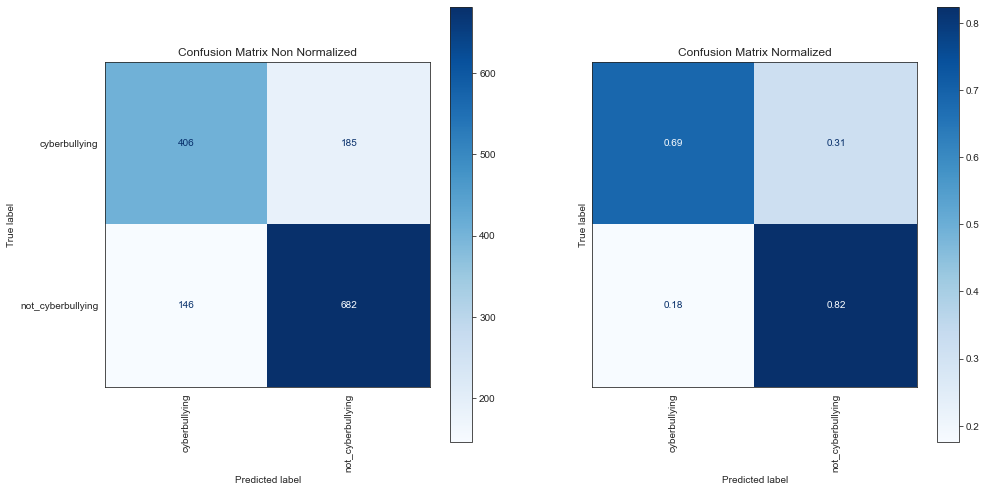

In [75]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Model Count Frequency

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.68      0.71       591
not_cyberbullying       0.78      0.83      0.80       828

         accuracy                           0.76      1419
        macro avg       0.76      0.75      0.75      1419
     weighted avg       0.76      0.76      0.76      1419



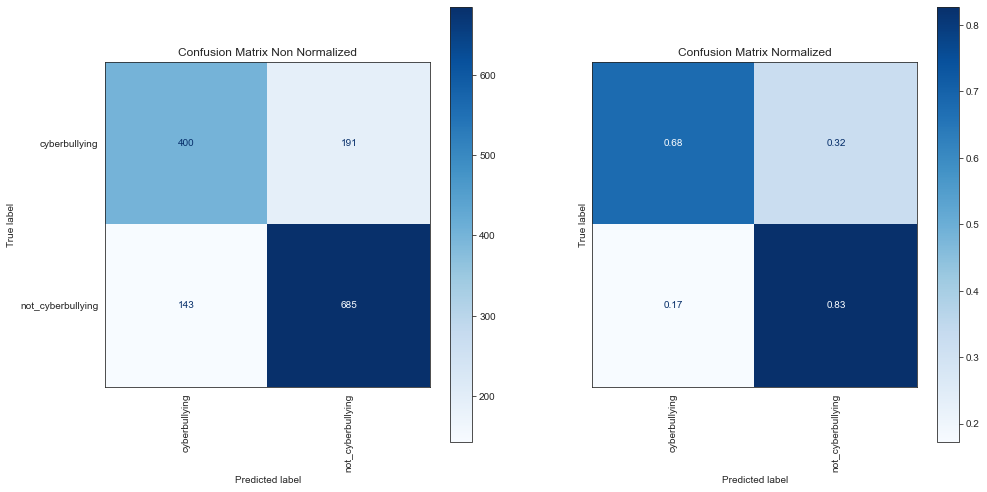

In [76]:
pipeline = ModelPipeline(RandomUnderSampler(), CountVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

Terlihat bahwa walau dalam perbedaan yang sangat kecil, namun ada efek yang diberikan TF-IDF sehingga selanjutnya vectorizer yang digunakan adalah TF-IDF.

### Perbandingan Vectorizer berbasis Undersample dan Oversample untuk Handling Imbalance
Untuk menentukan teknik terbaik untuk mengatasi data yang tidak seimbang rasionya, dibuat 2 model sebagai pembanding.

#### Model Oversample

                   precision    recall  f1-score   support

    cyberbullying       0.77      0.68      0.72       591
not_cyberbullying       0.79      0.86      0.82       828

         accuracy                           0.78      1419
        macro avg       0.78      0.77      0.77      1419
     weighted avg       0.78      0.78      0.78      1419



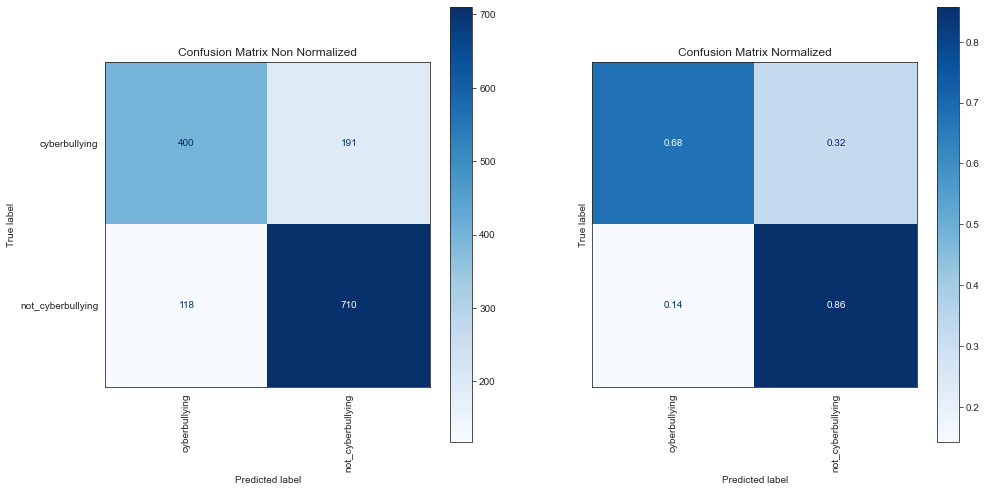

In [77]:
pipeline = ModelPipeline(RandomOverSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Model Undersample

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.64      0.69       591
not_cyberbullying       0.77      0.84      0.80       828

         accuracy                           0.76      1419
        macro avg       0.75      0.74      0.75      1419
     weighted avg       0.76      0.76      0.75      1419



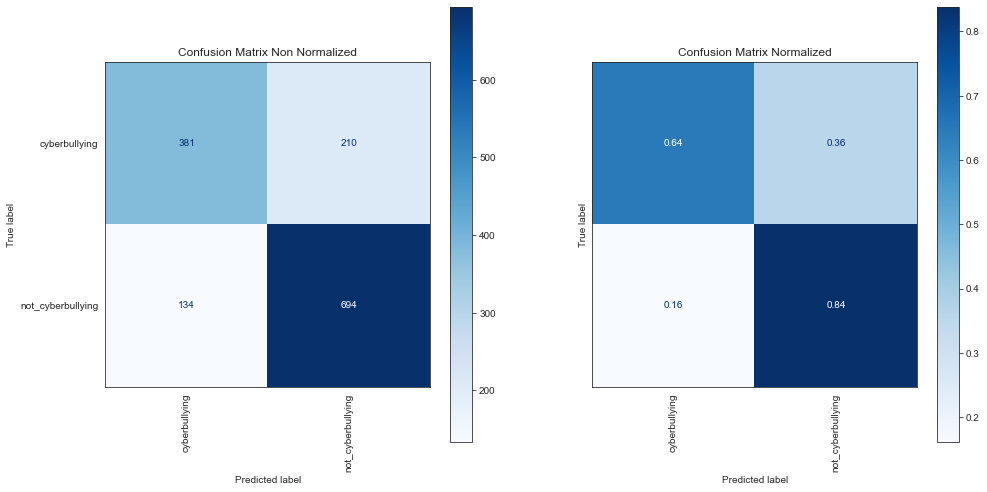

In [78]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

Ternyata perbedaannya tidak signifikan sehingga untuk efisiensi proses dan waktu, digunakan **undersampling** sehingga jumlah datanya tidak meningkat.

### Perbandingan Basis 1-grams dan 2-grams
Salah satu alternatif representasi encoding untuk pembelajaran mesin adalah bigram atau n-grams. Untuk melihat pengaruhnya, coba dibandingkan antara representasi kata dan bigram

#### Model Kata

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.64      0.68       591
not_cyberbullying       0.76      0.84      0.80       828

         accuracy                           0.76      1419
        macro avg       0.75      0.74      0.74      1419
     weighted avg       0.75      0.76      0.75      1419



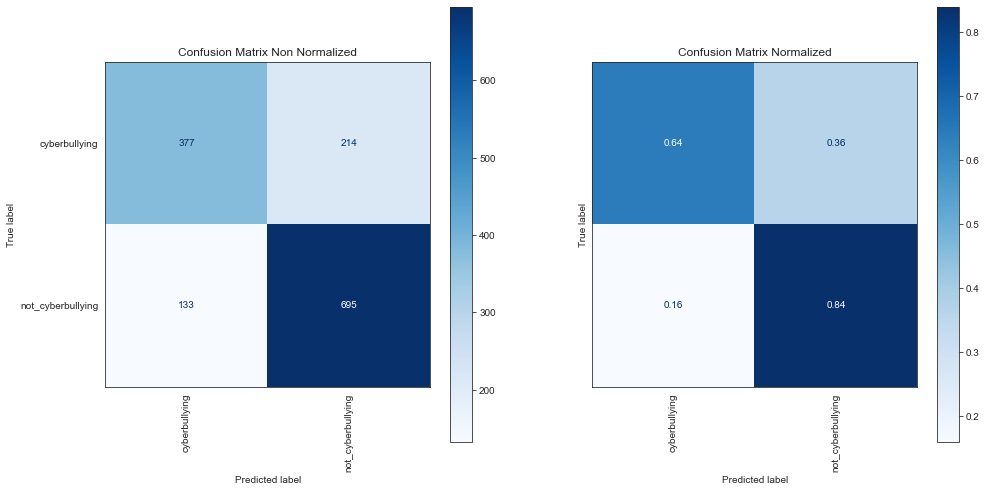

In [79]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000, ngram_range=(1,1)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Model Bigram

                   precision    recall  f1-score   support

    cyberbullying       0.84      0.21      0.34       591
not_cyberbullying       0.63      0.97      0.77       828

         accuracy                           0.65      1419
        macro avg       0.74      0.59      0.55      1419
     weighted avg       0.72      0.65      0.59      1419



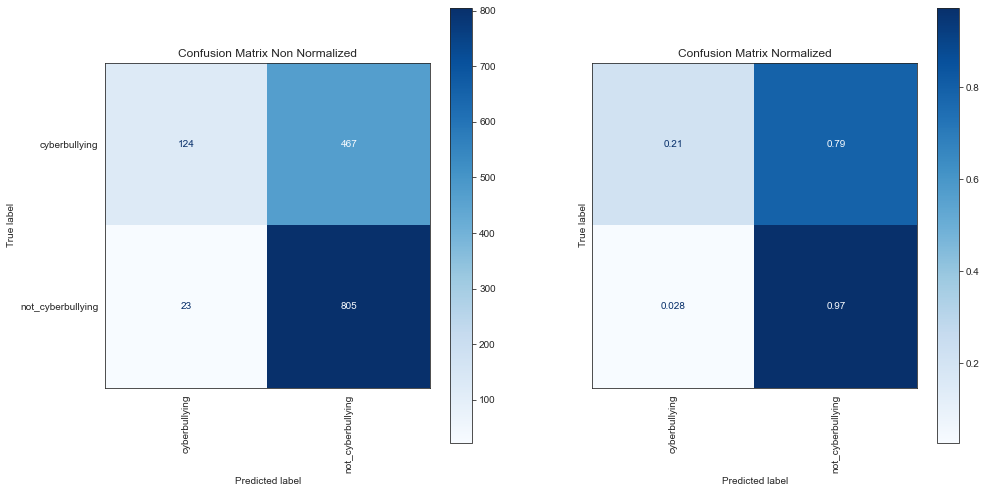

In [80]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000, ngram_range=(2,2)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

Terlihat bahwa untuk kasus ini masih lebih baik menggunakan basis kata dibandingkan bigram. Skor F1 untuk setiap kelas unggul pada representasi kata. Hal ini mungkin karena pendeteksian bullying masih lebih sensitif atas kata dibandingkan bigram yang mungkin sudah mengandung semantik yang lebih detail.

Untuk itu untuk eksperimen selanjutnya akan menggunakan basis kata.

### Perbandingan Algoritma Pembelajaran Mesin

#### Model Random Forest Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.71      0.72       591
not_cyberbullying       0.80      0.82      0.81       828

         accuracy                           0.77      1419
        macro avg       0.77      0.76      0.77      1419
     weighted avg       0.77      0.77      0.77      1419



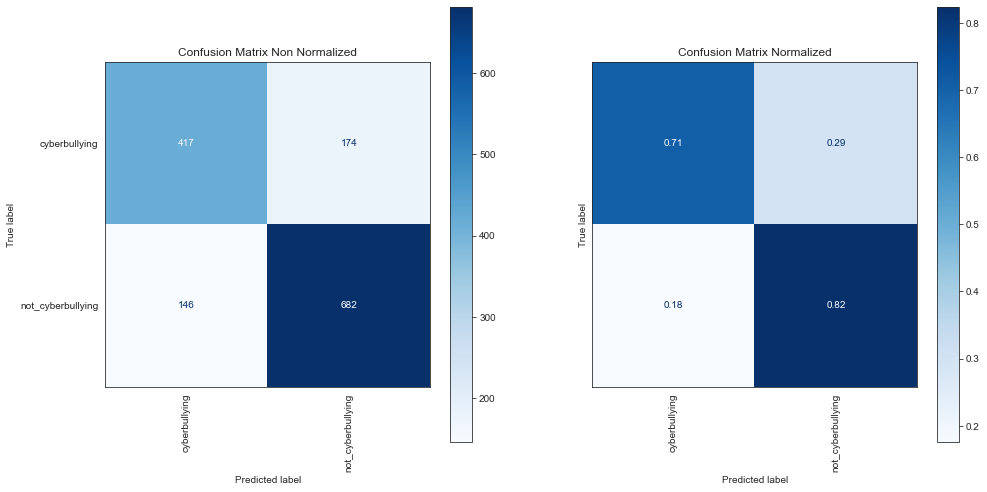

In [81]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Naive Bayes Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.72      0.84      0.78       591
not_cyberbullying       0.87      0.76      0.81       828

         accuracy                           0.80      1419
        macro avg       0.80      0.80      0.80      1419
     weighted avg       0.81      0.80      0.80      1419



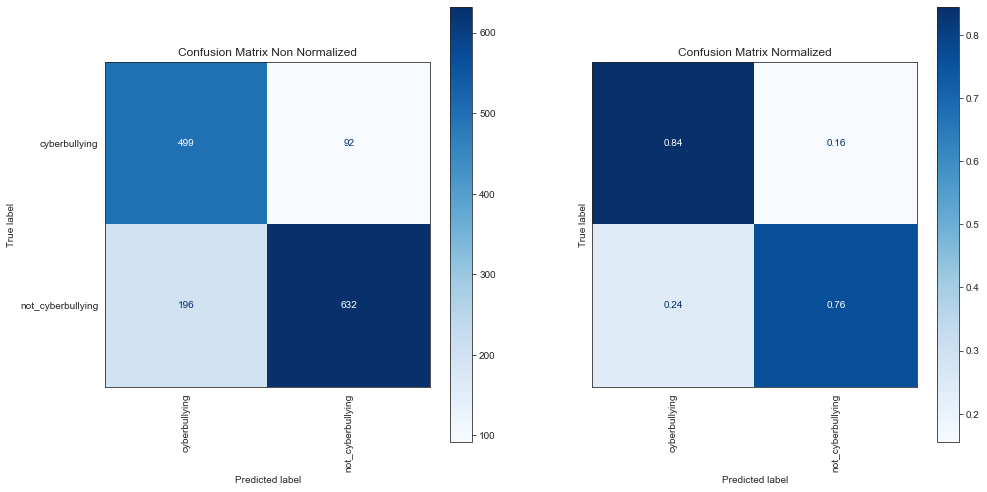

In [82]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MultinomialNB())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Decision Tree Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.80      0.20      0.32       591
not_cyberbullying       0.63      0.96      0.76       828

         accuracy                           0.65      1419
        macro avg       0.71      0.58      0.54      1419
     weighted avg       0.70      0.65      0.58      1419



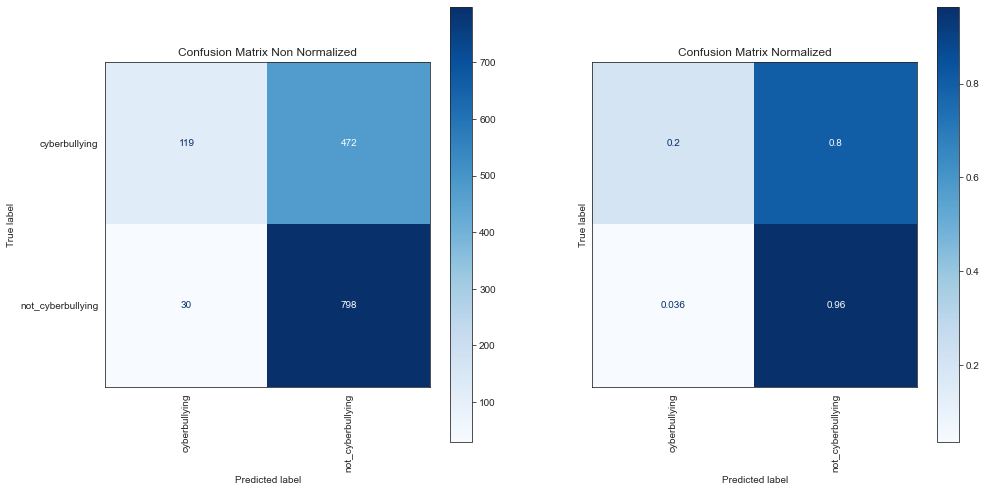

In [83]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), DecisionTreeClassifier(max_depth=5))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Neural Network MLP Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.72      0.75      0.74       591
not_cyberbullying       0.82      0.79      0.80       828

         accuracy                           0.78      1419
        macro avg       0.77      0.77      0.77      1419
     weighted avg       0.78      0.78      0.78      1419



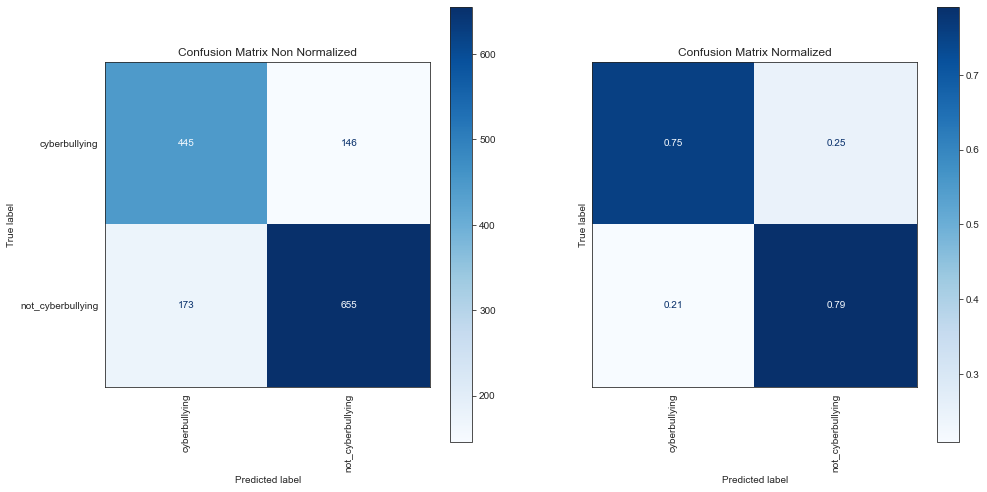

In [84]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MLPClassifier(solver='adam', max_iter=300, alpha=1e-5, hidden_layer_sizes=(30, 30), random_state=1))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### kNN Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.44      0.98      0.61       591
not_cyberbullying       0.88      0.12      0.21       828

         accuracy                           0.48      1419
        macro avg       0.66      0.55      0.41      1419
     weighted avg       0.70      0.48      0.38      1419



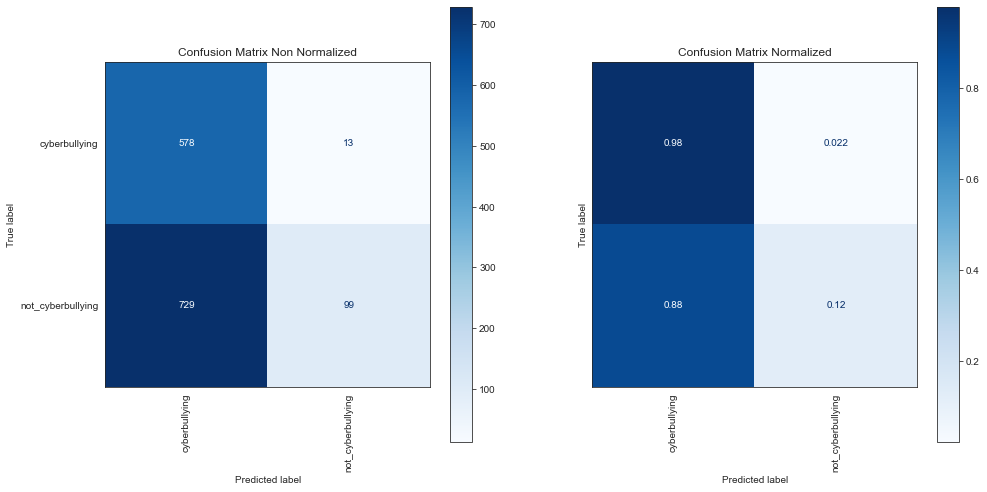

In [85]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), KNeighborsClassifier(n_neighbors=2))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

Semakin kecil k, didapatkan bahwa akurasi dan metric lainnya semakin baik. Mungkin dikarenakan pencarian kemiripan yang cukup 1-3 saja untuk melakukan klasifikasi dan jika lebih maka akan kurang sesuai.

#### Logistic Regression Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.75      0.81      0.78       591
not_cyberbullying       0.86      0.81      0.83       828

         accuracy                           0.81      1419
        macro avg       0.80      0.81      0.81      1419
     weighted avg       0.81      0.81      0.81      1419



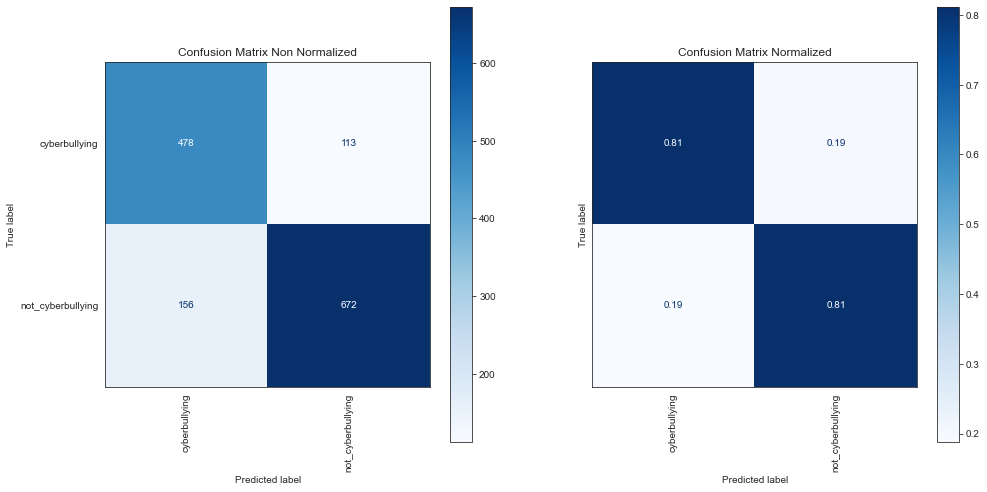

In [86]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LogisticRegression(solver='lbfgs', max_iter=2000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Linear SVM Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.75      0.82      0.78       591
not_cyberbullying       0.86      0.80      0.83       828

         accuracy                           0.81      1419
        macro avg       0.80      0.81      0.81      1419
     weighted avg       0.81      0.81      0.81      1419



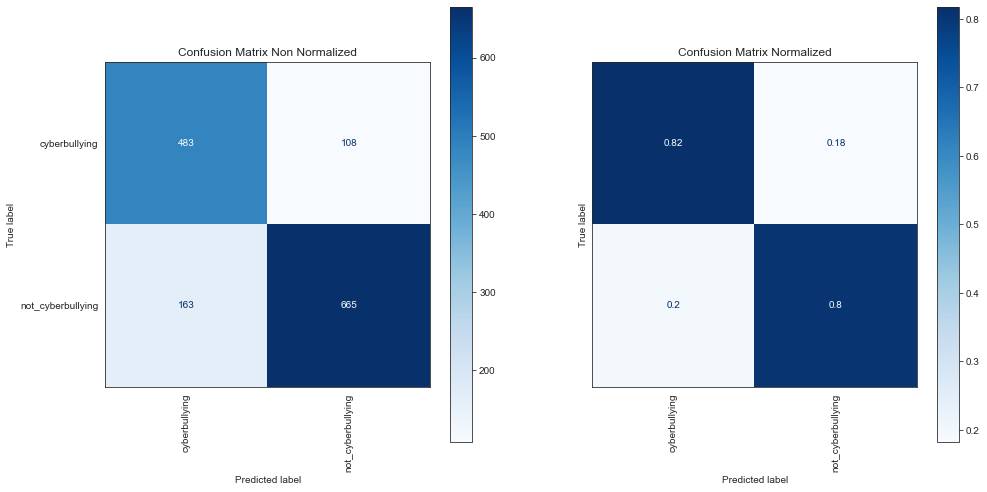

In [87]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LinearSVC(max_iter=10000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### XGBoost Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.75      0.78      0.77       591
not_cyberbullying       0.84      0.82      0.83       828

         accuracy                           0.80      1419
        macro avg       0.80      0.80      0.80      1419
     weighted avg       0.80      0.80      0.80      1419



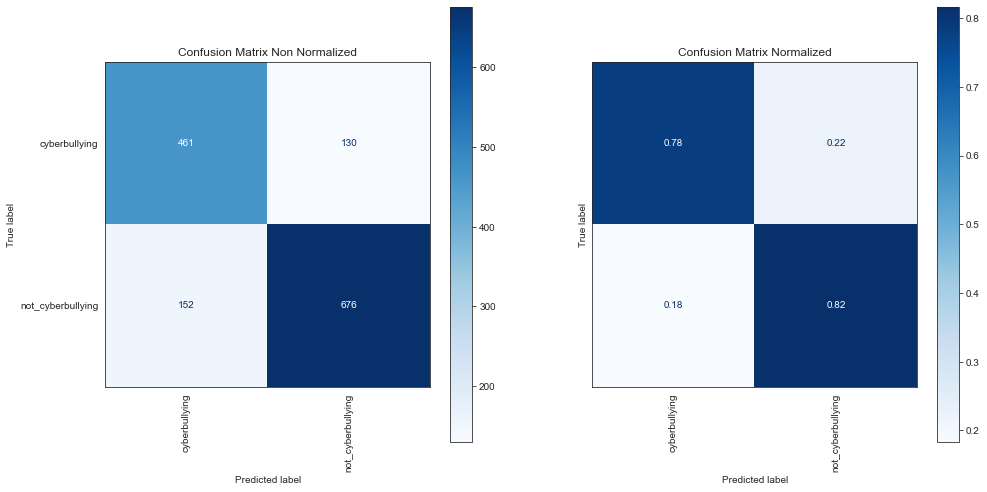

In [88]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), XGBClassifier(max_depth=10, use_label_encoder=False, eval_metric='mlogloss'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

## Evaluasi

### Metrik
Metrik utama yang saya gunakan dalam melakukan evaluasi adalah precision dan recall, diikuti dengan f1-score dan accuracy. Hal ini dikarenakan diperlukan pengamatan yang agak mendetail terkait dengan kemampuan klasifikasi. Selain itu, metrik precision-recall juga baik untuk menilai data yang bersifat imbalance, dimana diketahui bahwa akurasi sangat lemah terhadap data seperti itu. Data yang digunakan memiliki ketidakseimbangan sehingga diharapkan dengan menggunakan metrik ini akan mendapat yang terbaik.

### Model 2 Label Terbaik : Logistic Regression

In [101]:
pipeline1 = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LogisticRegression(solver='lbfgs', max_iter=2000))
pipeline1.fit(X_train, y_train)

y_pred = pipeline1.predict(X_test)

print(pipeline1.classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    cyberbullying       0.76      0.82      0.79       591
not_cyberbullying       0.86      0.81      0.84       828

         accuracy                           0.82      1419
        macro avg       0.81      0.82      0.81      1419
     weighted avg       0.82      0.82      0.82      1419



In [102]:
data = pd.DataFrame([{"text": "semoga mendapatkan yang terbaik"}])

print(pipeline1.predict_proba(data))
print(pipeline1.predict(data))

[0.88661626]
[1]


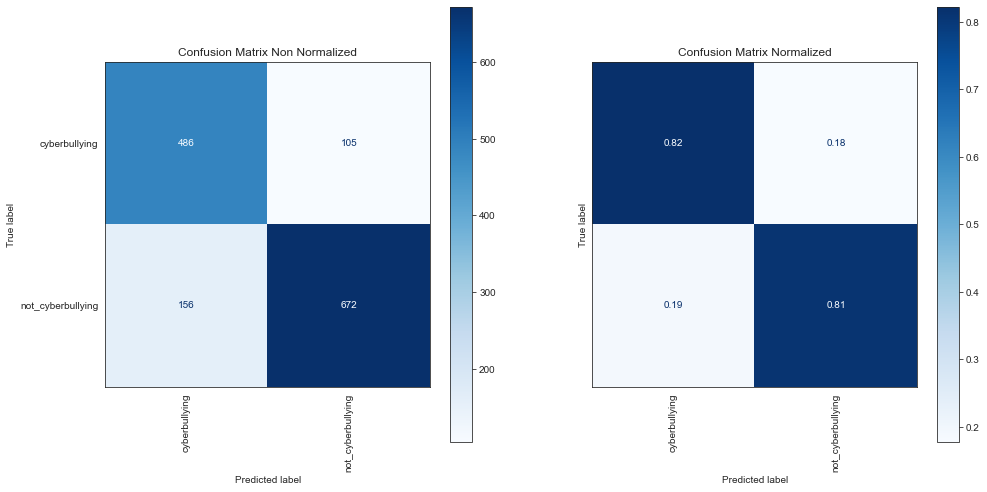

In [103]:
pipeline1.confusion_matrix_display(y_test, y_pred);

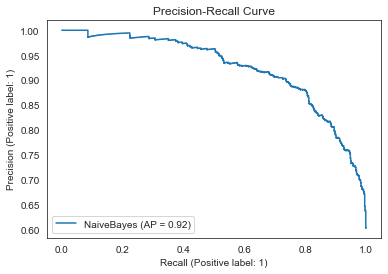

In [104]:
pipeline1.precision_recall_curve(y_test, pipeline1.predict_proba(X_test));

Terlihat bahwa kemampuan klasifikasinya sudah termasuk cukup baik karena nilai precision yang lebih dari 73% dan nilai recall yang lebih dari 83% pada setiap labelnya. Nilai f1-score pun juga mengukuti baiknya karena memang diturunkan dari precision recall sehingga mendapat lebih dari 79% untuk setiap kelasnya. Dapat dilihat dari kurva precision recall, terdapat kondisi optimal pada nilai precision dan recall di sekitar 80%.

### Kesimpulan
Klasifikasi cyberbullying pada dasarnya cukup berhasil dilakukan. Konfigurasi terbaik ditemukan dengan menggunakan TF-IDF sebagai representasi vektor kalimat, Undersampling untuk menangani imbalance, dan Basis kata dibanding menggunakan bigram. Ditemukan bahwa 2 algoritma terbaik adalah LinearSVM dan Logistic Regression. Jika dilihat  dari kedua algoritma tersebut artinya terdapat kata-kata (vektor encoding) yang menonjol untuk setiap kelas sehingga dapat menjadi elemen pembeda dala proses klasifikasi. Hal ini juga teramati pada wordcloud yang mana kata kata dari setiap kelas cukup terindentifikasi unik. Kesulitan klasifikasi masih dihadapkan pada kelas not dan other, hal ini dapat ditingkatkan dengan menambah data dari domain yang lebih luas dan pelabelan yang lebih akurat.

### Save Model

In [105]:
import dill

f = open("../model/model.pkl", "wb")
dill.dump(pipeline1, f, recurse=True)
f.close()

In [106]:
f = open("../model/model.pkl", "rb")
pipelinex = dill.load(f)
f.close()

data = pd.DataFrame([{"text": "dasar jelek ga tau malu"}])

print(pipelinex.predict_proba(data))

[0.08881001]


In [124]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import text, sequence
import tensorflow as tf

f = open("../model/model_keras_id/tokenizer.pkl", "rb")
tokenizer = dill.load(f)
f.close()


model = load_model('../model/model_keras_id/rnn_fasttext.h5')

data = ["goblok anda"]

data = tokenizer.texts_to_sequences(data)
print(data)

data  = sequence.pad_sequences(data, maxlen=50)
print(data.shape)
with tf.device('/cpu:0'):
    print(model.predict(data))

[[133, 824]]
(1, 50)
[[0.26325968 0.73674035]]


In [116]:
import tensorflow as tf
print(tf.__version__)

2.6.0
